In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
def parse_gro_file(gro_file_path):
    with open(gro_file_path, 'r') as file:
        lines = file.readlines()
    
    # Skip header and last line (box vectors)
    atom_lines = lines[2:-1]

    # Initialize min and max coordinates
    min_coords = [float('inf'), float('inf'), float('inf')]
    max_coords = [-float('inf'), -float('inf'), -float('inf')]

    for line in atom_lines:
        # Extract coordinates
        x, y, z = float(line[20:28]), float(line[28:36]), float(line[36:44])

        # Update min and max coordinates
        min_coords = [min(min_coords[i], coord) for i, coord in enumerate([x, y, z])]
        max_coords = [max(max_coords[i], coord) for i, coord in enumerate([x, y, z])]

    min_coords=np.array(min_coords)*10
    max_coords=np.array(max_coords)*10
    return min_coords, max_coords

# Replace 'your_file.gro' with the path to your GRO file
min_coordinates, max_coordinates = parse_gro_file('../gromacs3/topology/processed.gro')

print("Minimum coordinates:", min_coordinates)
print("Maximum coordinates:", max_coordinates)
max_coordinates-min_coordinates

Minimum coordinates: [ 6.2  16.03 91.35]
Maximum coordinates: [ 17.03  26.58 180.97]


array([10.83, 10.55, 89.62])

In [31]:
path_force_1='../gromacs3/md_0_2/force_1.xvg'
path_force_2='../gromacs3/md_0_2/force_2.xvg'
path_dis_1='../gromacs3/md_0_2/position_1.xvg'
path_dis_2='../gromacs3/md_0_2/position_2.xvg'

df_dis_1 = pd.read_csv(path_dis_1, delim_whitespace=True, header=None, comment='@', skiprows=17)
df_dis_2 = pd.read_csv(path_dis_2, delim_whitespace=True, header=None, comment='@', skiprows=17)
df_for_1 = pd.read_csv(path_force_1, delim_whitespace=True, header=None, comment='@', skiprows=17)
df_for_2 = pd.read_csv(path_force_2, delim_whitespace=True, header=None, comment='@', skiprows=17)

df_dis_1.columns = ['Time', 'd_1_x', 'd_1_y','d_1_z',
              'd_2_x','d_2_y','d_2_z',
              'd_3_x','d_3_y','d_3_z']

df_dis_2.columns = ['Time', 'd_1_x', 'd_1_y','d_1_z',
              'd_2_x','d_2_y','d_2_z',
              'd_3_x','d_3_y','d_3_z']

df_for_1.columns = ['Time', 'f_1_x', 'f_1_y','f_1_z',
              'f_2_x','f_2_y','f_2_z',
              'f_3_x','f_3_y','f_3_z']

df_for_2.columns = ['Time', 'f_1_x', 'f_1_y','f_1_z',
              'f_2_x','f_2_y','f_2_z',
              'f_3_x','f_3_y','f_3_z']

df_for_1.iloc[:, 3::3]

,f_1_z,f_2_z,f_3_z
0,-366.7130,475.4030,-739.63500
1,-525.9360,295.6280,1012.52000
2,-1102.4900,-1654.6000,1104.15000
3,-1522.3400,143.7690,270.63600
4,-170.0740,-2166.2400,-2345.60000
5,311.2740,160.1430,-180.72900
6,-1393.5000,-2475.1500,-8.72186
7,86.1502,1201.7100,1617.70000
8,-637.7160,682.7430,-83.43980
9,-674.0160,-1780.8700,-1688.30000


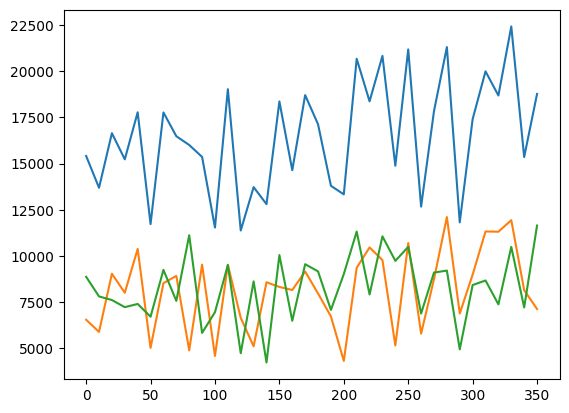

In [32]:
total_force_1 = df_for_1.iloc[:, 1::].apply(np.abs).sum(axis=1)
total_force_2 = df_for_2.iloc[:, 1::].apply(np.abs).sum(axis=1)
total_force=total_force_1+total_force_2
plt.plot(df_for_1['Time'], total_force)
plt.plot(df_for_1['Time'], total_force_1)
plt.plot(df_for_1['Time'], total_force_2)

5.278666666666666

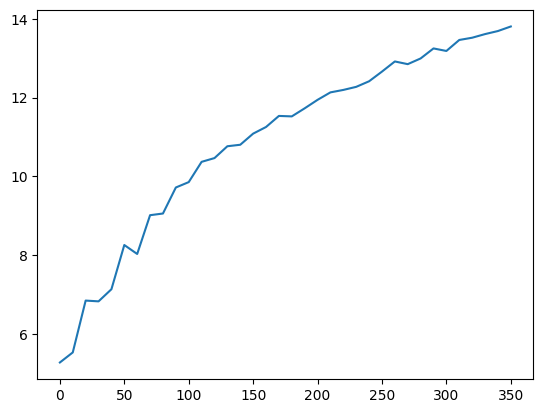

In [33]:
total_dis_1 = df_dis_1.iloc[:, 1::].apply(np.abs).sum(axis=1)
total_dis_2 = df_dis_2.iloc[:, 1::].apply(np.abs).sum(axis=1)


total_dis=total_dis_2-total_dis_1

plt.plot(df_for_1['Time'], total_dis/3)

# plt.plot(df_for_1['Time'], total_dis_1)
# plt.plot(df_for_1['Time'], total_dis_2)
total_dis[0]/3

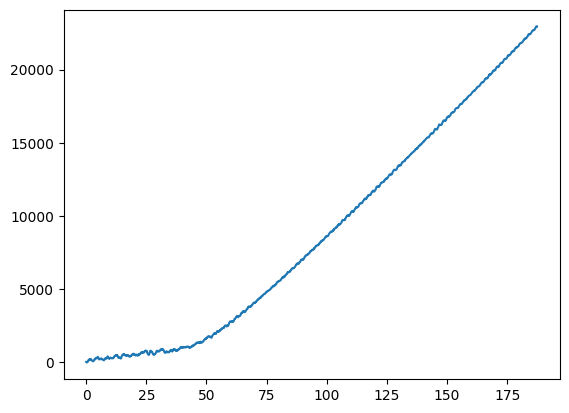

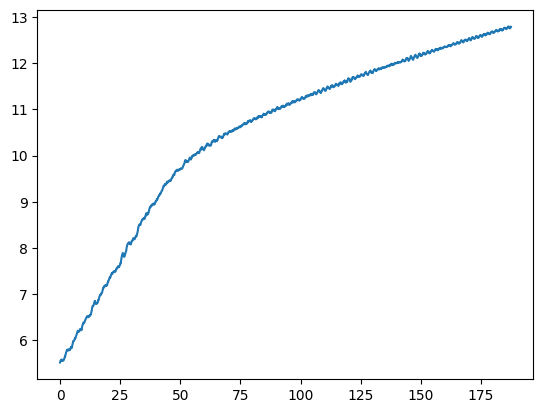

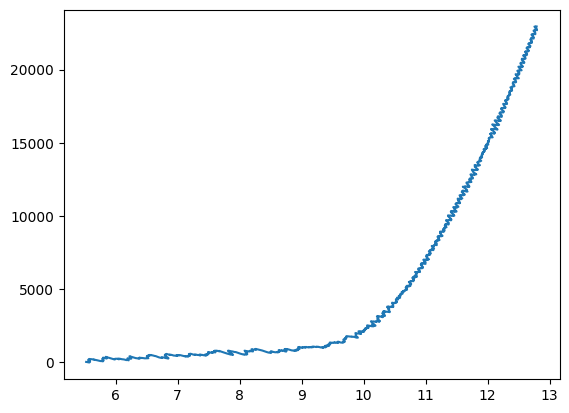

In [34]:
# Replace this with your .xvg file path
path_for = '../gromacs3/md_5_0/md_pullf.xvg'

# Read the file, skipping the header
data_for = pd.read_csv(path_for, delim_whitespace=True, comment='@', header=None, skiprows=17)

path_dis = '../gromacs3/md_5_0/md_pullx.xvg'

# Read the file, skipping the header
data_dis = pd.read_csv(path_dis, delim_whitespace=True, comment='@', header=None, skiprows=17)

# Assuming the first column is time, the second is force/displacement
time = data_dis[0]

# Perform your analysis here
# For example, calculating the average:
plt.plot(time,data_for[1])
plt.show()
plt.plot(time,data_dis[1])
plt.show()
plt.plot(data_dis[1],data_for[1])

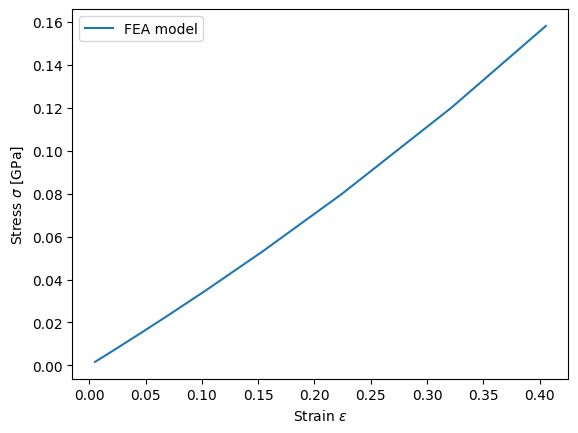

In [35]:
plot_abaqus=pd.read_csv('./abaqus/stress_strain_plot.csv')
plt.plot(plot_abaqus['0'],plot_abaqus['0.1'],label='FEA model')

# plot_gromacs=pd.read_csv('./gromacs/stress_strain.csv')
# plt.plot(plot_gromacs[],plot_gromacs[],label='MD model')

plt.xlabel('Strain $\epsilon$')
plt.ylabel('Stress $\sigma$ [GPa]')
plt.legend()